In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from mpl_toolkits.basemap import Basemap

In [15]:
df = pd.read_excel('b30 stats.xlsx')
df.head()

,date,datenormal,date_gap,disp,flags,lat,lon,mask,size,vel_angle,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,2012145,2012-05-24,0,0.0,13,-74.769,-107.356,0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012146,2012-05-25,1,0.0,13,-74.769,-107.356,0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012147,2012-05-26,1,0.0,13,-74.769,-107.356,0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012148,2012-05-27,1,0.0,13,-74.769,-107.356,0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012149,2012-05-28,1,0.0,13,-74.769,-107.356,0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
len(df)

2471

In [17]:
df['year'] = df['datenormal'].dt.year
df_yearly = df.groupby(['year'], as_index=False)['lon', 'lat'].last()
df_yearly

,year,lon,lat
0,2012,-108.777,-73.209
1,2013,-118.178,-71.541
2,2014,-128.515,-73.604
3,2015,-131.757,-73.886
4,2016,-154.105,-73.494
5,2017,-155.250,-68.700
6,2018,-139.438,-64.064
7,2019,-133.717,-65.450


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


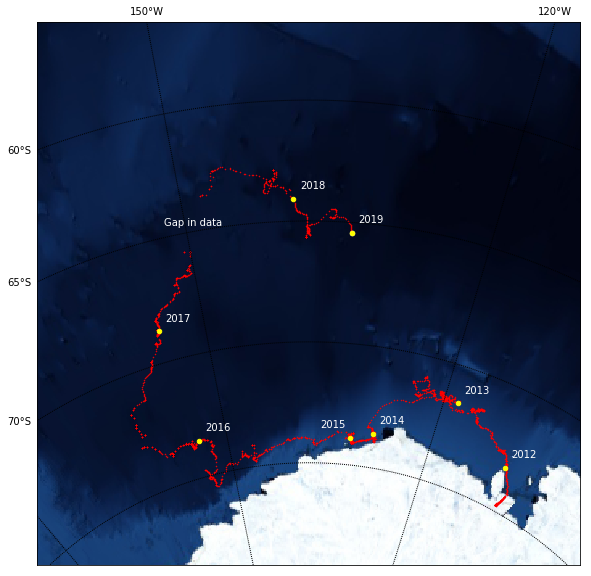

In [33]:
plt.figure(figsize=(10,10))
m = Basemap(projection='aeqd', resolution='l', lat_0=-68, lon_0=-138, width=2500000, height=2500000)
m.drawmeridians(np.arange(0,360,30), labels=[False, False, True, False])
m.drawparallels(np.arange(-90,90,5), labels=[True, False, False, False])

lons = df['lon'].values
lats = df['lat'].values
x, y = m(lons, lats)

# plot the daily positions
m.scatter(x, y, 1, marker='.', color='r')
m.scatter(x[-1], y[-1], 20, marker='o', color='white')

# plot the yearly positions
x, y = m(df_yearly['lon'].values, df_yearly['lat'].values)
m.scatter(x, y, 20, marker='o', color='yellow')

for index, row in df_yearly.iterrows():
    if row['year'] == 2015:
        xpos = x[index] - 140000
    else:
        xpos = x[index] + 30000
        
    ypos = y[index] + 50000
    plt.text(xpos, ypos, int(row['year']), fontdict={'color':  'white'})
    
x,y = m(-152, -64.5)
plt.text(x, y, 'Gap in data', fontdict={'color':  'white'})

m.bluemarble(scale=1)